In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the datetime module from the datetime library
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | maraa
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | bria
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | vanavara
Processing Record 14 of Set 1 | curvelo
Processing Record 15 of Set 1 | kyshtovka
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | gurlan
Processing Record 19 of Set 1 | haukipudas
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | bluff
Processing Record 24 of Set 1 | waipawa
Pr

Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | ouadda
Processing Record 42 of Set 4 | pangody
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | meiktila
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | dickinson
Processing Record 48 of Set 4 | gamba
Processing Record 49 of Set 4 | aktau
Processing Record 50 of Set 4 | tommot
Processing Record 1 of Set 5 | narsaq
Processing Record 2 of Set 5 | kloulklubed
Processing Record 3 of Set 5 | amderma
City not found. Skipping...
Processing Record 4 of Set 5 | makakilo city
Processing Record 5 of Set 5 | menongue
Processing Record 6 of Set 5 | beypur
City not found. Skipping...
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | zhigansk
Processing Record 9 of Set 5 | norrtalje
Processing Record 10 of Set 5 | colares
Processing Record 11 of Set 5 | royal 

Processing Record 30 of Set 8 | bemidji
Processing Record 31 of Set 8 | gorele
Processing Record 32 of Set 8 | high rock
Processing Record 33 of Set 8 | guiren
Processing Record 34 of Set 8 | candelaria
Processing Record 35 of Set 8 | saiha
Processing Record 36 of Set 8 | corrente
Processing Record 37 of Set 8 | alberton
Processing Record 38 of Set 8 | lolua
City not found. Skipping...
Processing Record 39 of Set 8 | okha
Processing Record 40 of Set 8 | kaeo
Processing Record 41 of Set 8 | kysyl-syr
Processing Record 42 of Set 8 | bambari
Processing Record 43 of Set 8 | kachug
Processing Record 44 of Set 8 | mayumba
Processing Record 45 of Set 8 | clyde river
Processing Record 46 of Set 8 | kamaishi
Processing Record 47 of Set 8 | conceicao do araguaia
Processing Record 48 of Set 8 | honiara
Processing Record 49 of Set 8 | ceres
Processing Record 50 of Set 8 | cayenne
Processing Record 1 of Set 9 | awash
Processing Record 2 of Set 9 | manokwari
Processing Record 3 of Set 9 | neuquen
Pr

Processing Record 18 of Set 12 | ghauspur
Processing Record 19 of Set 12 | tezu
Processing Record 20 of Set 12 | bambanglipuro
Processing Record 21 of Set 12 | ixtapa
Processing Record 22 of Set 12 | nara
Processing Record 23 of Set 12 | sawakin
Processing Record 24 of Set 12 | teguldet
Processing Record 25 of Set 12 | derzhavinsk
Processing Record 26 of Set 12 | saldanha
Processing Record 27 of Set 12 | mayo
Processing Record 28 of Set 12 | sorong
Processing Record 29 of Set 12 | plettenberg bay
Processing Record 30 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 31 of Set 12 | inongo
Processing Record 32 of Set 12 | hue
Processing Record 33 of Set 12 | magadan
Processing Record 34 of Set 12 | desaguadero
Processing Record 35 of Set 12 | divo
Processing Record 36 of Set 12 | marawi
Processing Record 37 of Set 12 | sovetskiy
Processing Record 38 of Set 12 | uwayl
City not found. Skipping...
Processing Record 39 of Set 12 | san luis
Processing Record 40 of Set 12 |

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,78.80,65,3,16.11,ZA,2021-01-14 12:32:22
1,Busselton,-33.6500,115.3333,68.00,58,26,17.13,AU,2021-01-14 12:31:57
2,Maraa,-1.8333,-65.3667,77.92,92,100,0.98,BR,2021-01-14 12:35:57
3,Upernavik,72.7868,-56.1549,19.15,96,100,2.64,GL,2021-01-14 12:31:59
4,Mahebourg,-20.4081,57.7000,82.40,69,40,11.50,MU,2021-01-14 12:32:41
5,Punta Arenas,-53.1500,-70.9167,53.60,82,75,8.05,CL,2021-01-14 12:29:08
6,Kruisfontein,-34.0033,24.7314,90.00,59,0,7.00,ZA,2021-01-14 12:32:37
7,Te Anau,-45.4167,167.7167,53.08,87,15,0.81,NZ,2021-01-14 12:31:59
8,Hobart,-42.8794,147.3294,57.99,94,75,1.14,AU,2021-01-14 12:32:11
9,Bria,6.5423,21.9863,103.98,10,0,3.40,CF,2021-01-14 12:35:58


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-01-14 12:32:22,-34.5322,20.0403,78.80,65,3,16.11
1,Busselton,AU,2021-01-14 12:31:57,-33.6500,115.3333,68.00,58,26,17.13
2,Maraa,BR,2021-01-14 12:35:57,-1.8333,-65.3667,77.92,92,100,0.98
3,Upernavik,GL,2021-01-14 12:31:59,72.7868,-56.1549,19.15,96,100,2.64
4,Mahebourg,MU,2021-01-14 12:32:41,-20.4081,57.7000,82.40,69,40,11.50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

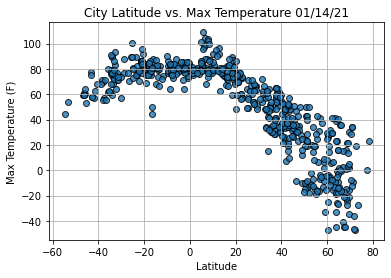

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

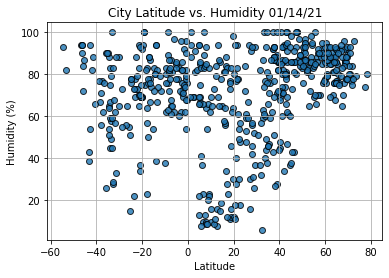

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

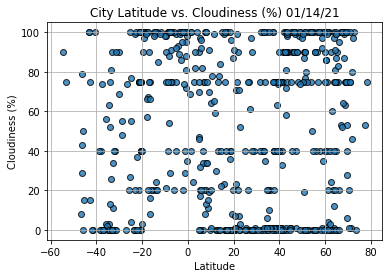

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

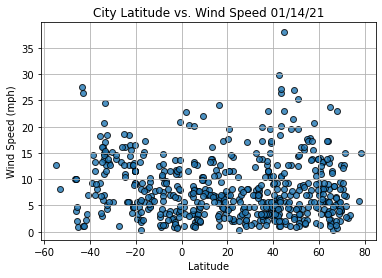

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()